In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# create the function f(x)
def f(x):
    return 3*x**2 -4*x + 5

In [9]:
f(3.0)

20.0

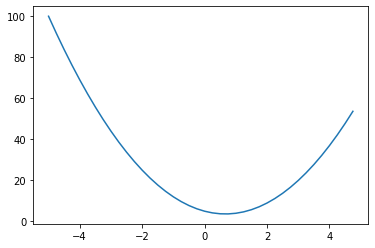

In [20]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

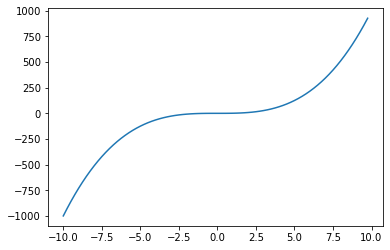

In [24]:
#####
def y(x):
    return x**3
ns = np.arange(-10,10,0.25)
ms = y(ns)
plt.plot(ns,ms)

In [25]:
h = 0.000001
x = 2/3
(f(x + h) - f(x))/h

2.999378523327323e-06

In [28]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(a,b,c,d)

2.0 -3.0 10.0 4.0


In [29]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h #tiny increase to c
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slopre',(d2-d1)/h)

d1 4.0
d2 4.0001
slopre 0.9999999999976694


In [37]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # initialize to zero
        self._backward = lambda: None
        self.prev = set(_children)
        self.op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
            build_topo(self)

            self.grad = 1.0
            for node in reversed(topo):
                node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L


Value(data=-8.0)

In [41]:
from graphviz import Digraph

def trace(root):
    nodes, eges = set(), set()
    def build